# Using Polymorphism

Let's delve further into the idea of Object Oriented Programming.  Up to this point, we've been focusing on simulations.  Simulations make it easy to plan out classes, because each one is modeled on a real-world counterpart.  For example, our `Process` class was modeled on a well-known statistical concepts.  We could ask ourselves what behavior we expect a statistical process to have and use that information to help us choose methods.

As you become more skilled at object-oriented programming, however, your classes must become more abstract.  Programming becomes a matter or organizing functionality and data into sensible classes.  

As an example, let's say that we wanted to plot the value of a process over time.  We might just add a `plot()` method, but this wouldn't be especially modular - we might want to use different plotting techniques at different times and apply them to different Process subclasses.  Our plotting object may also need its own data - for example, to store limits for its axes.  For these reasons, instead of creating a `plot()` method, we would prefer to create a separate `ProcessPlotter()` class.

Below is our code for `Process` and its subclasses.  I have removed the print statement in `simulate` since we'd like to move all output to the new `ProcessPlotter` class.

In [63]:
import numpy as np

class Process:
    def __init__(self, start_value = 0):
        self.value = start_value
        
    def time_step(self):
        pass
    
    def __str__(self):
        return "Process with current value " + str(self.value)
    
    def simulate(self, steps = 20):
        for i in range(steps):
            self.time_step()
            
class BoundedLinearProcess(Process):
    def __init__(self, start_value = 0, velocity = 0):
        super().__init__(start_value)
        self.velocity = velocity
    
    def time_step(self):
        self.value += self.velocity
        if self.value < 0:
            self.value = -self.value
            self.velocity = -self.velocity
        if self.value > 1:
            self.value = 1 - (self.value - 1)
            self.velocity = -self.velocity
        super().time_step()

    def __str__(self):
        return " " * int(self.value*20) + "*"

class ARProcess(Process):
    
    def __init__(self, alpha = 0.5, sigma = 1, start_value = 0):
        super().__init__(start_value)
        self.alpha = alpha
        self.sigma = sigma
        
    def time_step(self):
        self.value = self.alpha * self.value + np.random.normal(scale = self.sigma)
        super().time_step()
        
    def __str__(self):
        if self.value<0:
            s = " " * int(5 * (self.value + 3)) + "*" + " " * int(-self.value * 5) + "|"
        elif self.value== 0:
            s = " " * 15 + "*"
        else:
            s = " " * 15 + "|" + " " * int(5 * self.value) + "*"
        return s
    
class RandomWalk(ARProcess):
    def __init__(self, sigma = .5):
        super().__init__(alpha = 1, sigma = sigma)

We will go ahead an make one change that we need for plotting.  We want each `Process` to keep track of its history.  That is, we want a data attribute to store the `Process`'s value at every time.  Since we were careful to call `super().time_step()` in every `time_step()` method, we only need to add one statement to `Process.time_step()` to make this happen.

In [64]:
import numpy as np

class Process:
    def __init__(self, start_value = 0):
        self.value = start_value
        self.history = []
        
    def time_step(self):
        self.history.append(self.value)
    
    def __str__(self):
        return "Process with current value " + str(self.value)
    
    def simulate(self, steps = 20):
        for i in range(steps):
            self.time_step()
            
class BoundedLinearProcess(Process):
    def __init__(self, start_value = 0, velocity = 0):
        super().__init__(start_value)
        self.velocity = velocity
    
    def time_step(self):
        self.value += self.velocity
        if self.value < 0:
            self.value = -self.value
            self.velocity = -self.velocity
        if self.value > 1:
            self.value = 1 - (self.value - 1)
            self.velocity = -self.velocity
        super().time_step

    def __str__(self):
        return " " * int(self.value*20) + "*"

class ARProcess(Process):
    
    def __init__(self, alpha = 0.5, sigma = 1, start_value = 0):
        super().__init__(start_value)
        self.alpha = alpha
        self.sigma = sigma
        
    def time_step(self):
        self.value = self.alpha * self.value + np.random.normal(scale = self.sigma)
        super().time_step()
        
    def __str__(self):
        if self.value<0:
            s = " " * int(5 * (self.value + 3)) + "*" + " " * int(-self.value * 5) + "|"
        elif self.value== 0:
            s = " " * 15 + "*"
        else:
            s = " " * 15 + "|" + " " * int(5 * self.value) + "*"
        return s
    
class RandomWalk(ARProcess):
    def __init__(self, sigma = .5):
        super().__init__(alpha = 1, sigma = sigma)

Let's start writing our ProcessPlotter class.  Even if we're just writing one class, we may find it useful to start with an abstract base class, just so we know what methods we want.

In [65]:
class ProcessPlotter(object):
    """An object to display the history of a Process"""
    def __init__(self, process = None):
        self.process = process
        
    def plot(self):
        pass

We can now subclass our ProcessPlotter to make the `plot()` method useful.

In [66]:
class TextProcessPlotter(ProcessPlotter):
    def plot(self):
        upper = max(self.process.history)
        lower = min(self.process.history)
        if upper == lower:
            upper += 1
        for val in self.process.history:
            print(" " * int(20 *(val - lower)/(upper - lower))  + "*")

In [67]:
p1 = ARProcess(alpha = .9)
plotter1 = TextProcessPlotter(p1)
p1.simulate(10)
plotter1.plot()

                    *
     *
            *
           *
*
   *
*
    *
                *
                   *


Notice how our AR process works with our `ProcessPlotter`.  We could also do the same thing with a `RandomWalk`.

In [68]:
p2 = RandomWalk()
plotter2 = TextProcessPlotter(p2)
p2.simulate(20)
plotter2.plot()

          *
        *
             *
               *
        *
             *
           *
               *
              *
                    *
              *
*
       *
*
   *
               *
         *
        *
         *
      *


This is a nice demonstration of what we call polymorphism.  This word simply means that different classes can share the same interface, allowing them to be used in the same way.  Here, our `TextProcessPlotter` doesn't care if it gets a `ARProcess` or a `RandomWalk`.  The functionality it relies on is specified by the common superclass, `Process`.

Just for good measure, let's create a nicer `ProcessPlotter`, borrowing tools from the MatPlotLib package.

In [69]:
import matplotlib
%matplotlib inline

class GraphicProcessPlotter(ProcessPlotter):
    def plot(self):
        matplotlib.pyplot.plot(self.process.history)
        matplotlib.pyplot.title("Process Time Plot")

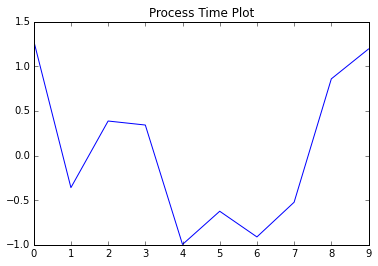

In [70]:
plotter3 = GraphicProcessPlotter(p1)
plotter3.plot()

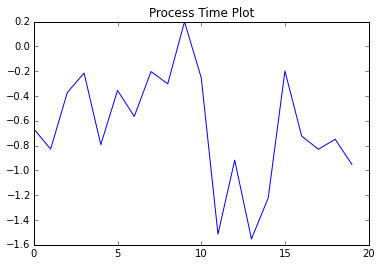

In [71]:
plotter4 = GraphicProcessPlotter(p2)
plotter4.plot()

Essentially, we now have polymorphism on two sides.  Subclasses of `Process` can work with subclasses of `ProcessPlotter` and neither class needs to know exaclty which partner class its working with.